# The Discrete Fourier transform and its applications

## Complex numbers

First we recall some fundamental concepts, ideas and identities from  [Matte 4K](https://wiki.math.ntnu.no/tma4120/2024h/tempoplan), see in particular
week 35 - week 38. 

[Complex numbers] : $z = a + bi$ where $a$ and $b$ are real numbers and $i = \sqrt{-1}$ is the imaginary unit.
 
[Complex conjugate] : of $z$ is $\bar{z} = a - bi$.

[Euler's formula] : $e^{i\theta} = \cos \theta + i\sin\theta$.

[Polar form] : $z = x + iy = r e^{i\theta}$ where $r = |z| = \sqrt{x^2+y^2}$ is the **magnitude and $\theta = \arg z = \arctan(y/x)$
is the  **argument** or **phase**.


:::{admonition} TODO
:class: danger dropdown
Add image to illustrate  nth unity root
:::

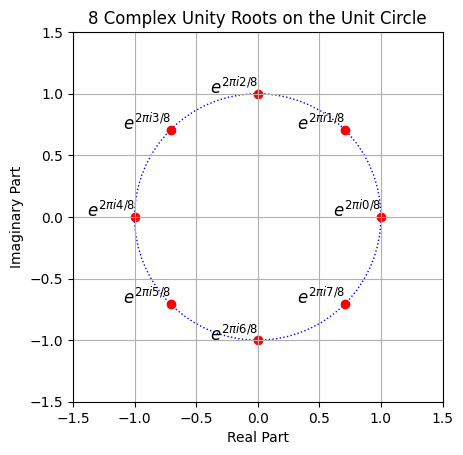

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def plot_complex_unity_roots(n):
    # Calculate the roots
    roots = [np.exp(2j * np.pi * k / n) for k in range(n)]
    
    # Extract real and imaginary parts
    real_parts = [root.real for root in roots]
    imag_parts = [root.imag for root in roots]
    
    # Plot the unit circle
    circle = plt.Circle((0, 0), 1, color='blue', fill=False, linestyle='dotted')
    
    fig, ax = plt.subplots()
    ax.add_artist(circle)
    
    # Plot the roots
    ax.scatter(real_parts, imag_parts, color='red')
    
    # Add labels to the roots
    for k, (real, imag) in enumerate(zip(real_parts, imag_parts)):
        label = f'$e^{{2\\pi i {k}/{n}}}$'
        ax.text(real, imag, label, fontsize=12, ha='right')
    
    # Set equal aspect ratio
    ax.set_aspect('equal')
    
    # Set limits
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    
    # Add grid
    ax.grid(True)
    
    # Add labels
    ax.set_xlabel('Real Part')
    ax.set_ylabel('Imaginary Part')
    ax.set_title(f'{n} Complex Unity Roots on the Unit Circle')
    
    plt.show()

# Example usage
plot_complex_unity_roots(8)

In [ ]:
# TODO: Present operation of complex numbers in Python
z1 = complex(1,2)
print(z1)
z2 = 1 + 2j
print(z2)


## Complex inner product spaces and orthogonal systems

:::{prf:definition} Complex inner product space
:labeled: fou:def:inner

Let  $V$ be a complex vector space. An inner product on $V$ is a function $\langle \cdot, \cdot \rangle : V \times V \to \mathbb{C}$ that satisfies the following properties for all $f,g,h \in V$ and all $\alpha,\beta \in \mathbb{C}$:

1. **Linearity in the first argument:**
$$
\langle \alpha f + \beta g, h \rangle = \alpha \langle f,h \rangle + \beta \langle g,h \rangle.
$$

2. **Conjugate symmetry:**
$$
\langle f,g \rangle = \overline{\langle g,f \rangle}.
$$

3. **Positive definiteness:**
$$
\langle f,f \rangle \geq 0,
$$
with equality if and only if $f = 0$.

As with all inner product spaces, a norm by

$$
\|f\| = \sqrt{\langle f,f \rangle}.
$$ (fou:eq:def:norm)

and we have the Cauchy-Schwarz inequality

$$
|\langle f,g \rangle| \leqslant \|f\| \|g\|.
$$ (fou:eq:cauchy)

:::

For an inner product space, the Cauchy-Schwarz inequality holds
$$ 
|\langle f,g \rangle| \leqslant \|f\| \|g\| 
$$
and equality holds if and only if $f$ and $g$ are linearly dependent.

:::{prf:definition} Orthogonal system
:labeled: fou:def:ortho-syst 

A sequences/family $\{\phi_n\}_{n\in \mathbb{N}}$ of non-zero vectors $\phi_n$ in a complex inner product space $V$ is said to be **orthogonal** if 
$$
\langle \phi_n, \phi_m \rangle = 0, \quad n \neq m.
$$

If in addition $\|\phi_n\| = 1$ for all $n$, then the system is said to be **orthonormal**.

:::



For a given interval $[a,b]$, we define the set of square-integrable, possibly complex-valued function $L^2(I)$ by 

$$
L^2(I) = \left\{ f: I \to \mathbb{C} \mid \int_I |f(x)|^2 dx < \infty \right\}.
$$ (fou:eq:def:L2)

Here, the interval $I$ can be either finite, semi-infinite or infinite, i.e., the end point choices $a = -\infty$ and/or $b=\infty$ are allowed.

For $f,g \in L^2(I)$, an inner product is defined by

$$
\langle f,g \rangle = \int_I f(x) \bar{g}(x) dx.
$$ (fou:eq:def:inner)

From hereon, we think of $L^2(I)$ as a inner product space equipped with the inner product defined by {eq}`fou:eq:def:inner`.


Set $[a,b] = [-\pi, \pi]$. We have the following orthogonal systems in $L^2([-\pi,\pi])$.

:::{prf:example}  
:label: four:exa:ortho-complex

The set of functions $\{e^{inx}\}_{n \in \mathbb{Z}}$ is an orthogonal system in $L^2([-\pi,\pi])$.
Correspondingly, the set $\{e^{inx}/\sqrt{2\pi}\}_{n \in \mathbb{Z}}$ is an orthonormal system in $L^2([-\pi,\pi])$.

The set of functions 

$$
\{e^{inx}\}_{n \in \mathbb{Z}} \quad \text{and} \quad \{e^{inx}/\sqrt{2\pi}\}_{n \in \mathbb{Z}}
$$ are orthogonal and orthonormal system in $L^2([-\pi,\pi])$, respectively.

:::

:::{prf:example}  
:label: four:exa:ortho-real

The set of functions 
$$
\{1\} \cup \{\cos(nx)\}_{n=1}^\infty \cup \{\sin(nx)\}_{n=1}^\infty \quad \text{and} \quad \{1/\sqrt{2\pi}\} \cup \{\cos(nx)/\sqrt{\pi}\}_{n=1}^\infty \cup \{\sin(nx)/\sqrt{\pi}\}_{n=1}^\infty
$$ 
are orthogonal and orthonormal systems in $L^2([-\pi,\pi])$, respectively.

:::


## Fouries series

Let's consider a periodic function $f(x)$ with period $2\pi$, i.e., $f(x+2\pi) = f(x)$ for all $x$.
Then the formal **complex** Fourier series of $f(x)$ is given by

$$
f(x) = \sum_{k=-\infty}^{\infty} c_k e^{i k x}
$$ (fou:eq:fourier-series)

where $\{c_k\}_{k\in\mathbb{Z}}$ are the Fourier coefficients given by

$$
c_k = \frac{1}{2\pi} \int_{-\pi}^{\pi} f(x) e^{-i k x} \, d\mathrm{x}
$$ (fou:eq:fourier-coeff)


We denote by $S_N(f,x)$ the $N$-th partial sum of the Fourier series of $f(x)$, i.e.,

$$
S_N(f,x) = \sum_{k=-N}^{N} c_k e^{i k x}.
$$ (fou:eq:fourier-partial)



We set $L^2_p([-\pi,\pi])$ to be the set of periodic functions with period $2\pi$ 
which are square-integrable over some (and thus any) interval $[a, a+2\pi]$ of length $2\pi$.
